In [1]:
import tensorflow as tf
import os
import zipfile
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# melakukan ekstraksi pada file zip
!wget --no-check-certificate \
  'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip' \
  -O '/tmp/rockpaperscissors.zip'

zip_ref = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
zip_ref.extractall('/tmp/rocks-papers-or-scissors')
zip_ref.close()

--2021-07-27 06:17:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.14MB/s    in 56s     

2021-07-27 06:18:46 (5.55 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
base_dir = '/tmp/rocks-papers-or-scissors/rockpaperscissors'
os.listdir(base_dir)

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [4]:
os.remove(base_dir + '/README_rpc-cv-images.txt')
shutil.rmtree(base_dir + '/rps-cv-images')
os.listdir(base_dir)

['scissors', 'paper', 'rock']

In [5]:
print(len(os.listdir(base_dir + '/rock')))
print(len(os.listdir(base_dir + '/paper')))
print(len(os.listdir(base_dir + '/scissors')))

726
712
750


In [30]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [31]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset = 'training')
 
validation_generator = test_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset = 'validation')

num_class = validation_generator.num_classes
labels = train_generator.class_indices.keys()

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
print(num_class)
print(labels)

3
dict_keys(['paper', 'rock', 'scissors'])


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\n Accuracy > 96% training dihentikan")
      self.model.stop_training = True

callbacks = myCallback()

In [38]:
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=30,
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[callbacks])

Epoch 1/30
25/25 - 7s - loss: 0.2937 - accuracy: 0.9100 - val_loss: 0.3490 - val_accuracy: 0.9000
Epoch 2/30
25/25 - 7s - loss: 0.4573 - accuracy: 0.8367 - val_loss: 0.5332 - val_accuracy: 0.7500
Epoch 3/30
25/25 - 7s - loss: 0.2809 - accuracy: 0.8900 - val_loss: 0.3824 - val_accuracy: 0.9000
Epoch 4/30
25/25 - 7s - loss: 0.2326 - accuracy: 0.9300 - val_loss: 1.1427 - val_accuracy: 0.6500
Epoch 5/30
25/25 - 7s - loss: 0.2806 - accuracy: 0.9100 - val_loss: 0.6838 - val_accuracy: 0.8000
Epoch 6/30
25/25 - 7s - loss: 0.5655 - accuracy: 0.7300 - val_loss: 0.4075 - val_accuracy: 0.8000
Epoch 7/30
25/25 - 7s - loss: 0.3515 - accuracy: 0.8800 - val_loss: 0.2693 - val_accuracy: 0.9500
Epoch 8/30
25/25 - 8s - loss: 0.2276 - accuracy: 0.9300 - val_loss: 0.7445 - val_accuracy: 0.8500
Epoch 9/30
25/25 - 7s - loss: 0.1354 - accuracy: 0.9300 - val_loss: 0.3818 - val_accuracy: 0.8500
Epoch 10/30
25/25 - 7s - loss: 0.1580 - accuracy: 0.9500 - val_loss: 0.4244 - val_accuracy: 0.8500
Epoch 11/30
25/25 -

Saving img1.jpeg to img1 (2).jpeg
img1.jpeg
scissors


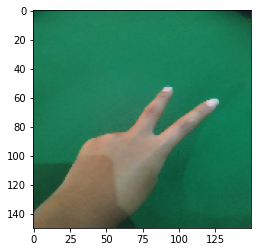

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  labels = ['paper', 'rock', 'scissors']

  print(fn)
  print(labels[np.argmax(classes)])

In [14]:
print('***********************************')
print('**     Ni Made Yuli Cahyani      **')
print('**  Bergabung sejak 12 Jul 2020  **')
print('**    Kabupaten Badung, Bali     **')
print('***********************************')

***********************************
**     Ni Made Yuli Cahyani      **
**  Bergabung sejak 12 Jul 2020  **
**    Kabupaten Badung, Bali     **
***********************************
